# Contents

I. [Data Overview](#I.-Data-Overview)

II. [EDA](#II.-Exploratory-Data-Analysis)

III. [Feature Engineering | Feature Selection](#III.-Feature-Engineering-|-Feature-Selection)

IV. [Modeling](#IV.-Modeling)

V. [Result Summary](#V.-Result-Summary)

# Problem Statement:


Trong nhiều lĩnh vực, nhiều ngành hoạt động kinh doanh, khách hàng luôn chiếm vai trò quan trọng bậc nhất đối với mọi doanh nghiệp. Doanh nghiệp viễn thông không phải ngoại lệ. Giờ đây, khách hàng có rất nhiều lựa chọn dịch vụ viễn thông từ nhiều công ty cung cấp. Chính vi vậy khách hàng luôn yêu cầu chất lượng dịch vụ phải tốt nếu không rất họ sẽ lựa chọn nhà cung cấp khác. Việc thu hút khách hàng mới luôn tốn nhiều chi phí và vì vậy xây dựng mô hình dự đoán, phân tích khách hàng rời bỏ (churn customer) có ý nghĩa quan trọng đối với doanh nghiệp.

**Dataset Attributes**

- customerID : Customer ID
- gender : Whether the customer is a male or a female
- SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
- Partner : Whether the customer has a partner or not (Yes, No)
- Dependents : Whether the customer has dependents or not (Yes, No)
- tenure : Number of months the customer has stayed with the company
- PhoneService : Whether the customer has a phone service or not (Yes, No)
- MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract : The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges : The amount charged to the customer monthly
- TotalCharges : The total amount charged to the customer
- Churn : Whether the customer churned or not (Yes or No)

---

# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', 85)

import warnings
warnings.filterwarnings('ignore')

# Import Data

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

# I. Data Overview

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [6]:
df.describe(include='O').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Khi chuyển `TotalCharges` về dạng số gặp lỗi không thể chuyển khoảng trắng về dạng số
- Bỏ qua những lỗi này và coi những giá trị đó là NaN

In [9]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [11]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
# Kiểm tra những giá trị null
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- Những dữ liệu này không có `TotalCharges` nhưng lại có `MonthlyCharges` dù `tenure = 0`

In [13]:
# Kiểm tra có bao nhiêu giá trị tenure = 0
df[df['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- Những data có `tenure = 0` chính là những data có `TotalCharges` là null nhưng vẫn có `MonthlyCharges`
- Điều này là vô lý nên bỏ những dòng data này

In [14]:
df.drop(labels=df[df['tenure']==0].index, axis=0, inplace=True)

In [15]:
# Check lại data null
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
# data sau khi bỏ giá trị null
df.shape

(7032, 21)

## Classify Features

**1. Categorical features**
- Churn (target)
- gender
- SeniorCitizen
- Partner
- Dependents
- PhoneService
- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- Contract       
- PaperlessBilling
- PaymentMethod


**2. Numerical features**

***Discrete***
- tenure


***Continuous***
- MonthlyCharges 
- TotalCharges

**3. Redundant features**
- customerID


**Drop redundant features**

In [17]:
df.drop('customerID', axis=1, inplace=True)
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


---

# II. Exploratory Data Analysis

In [18]:
# list of features
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                'Contract', 'PaperlessBilling', 'PaymentMethod']
target_feature = ['Churn']

num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

## 1. Target variable: Churn


In [19]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [20]:
df['Churn'].value_counts(normalize=True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Number of churn/not churn Customers')

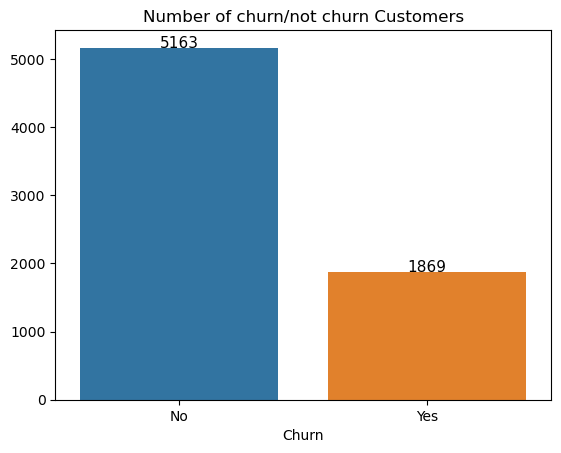

In [21]:
fig, ax = plt.subplots(1,1)

ax = sns.countplot(data=df, x='Churn')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
            horizontalalignment='center', fontsize = 11)
ax.set_ylabel(None)
ax.set_title('Number of churn/not churn Customers')

**Nhận xét**
- Bộ dataset này mất cân bằng **(imbalanced dataset)**
- Số lượng khách hàng ở lại lớn hơn nhiều khách hàng rời bỏ với tỷ lệ là 73.4% và 26.6%

## 2. Independent variables

## 2.1 Categorical Features

**Chia các categorical features thành các nhóm cùng loại**

In [22]:
# Group 1: Customer information
g1 = ['gender','SeniorCitizen','Partner','Dependents']

# Group 2: Services
g2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport']

# Group 3: Payment information
g3 = ['Contract','PaperlessBilling','PaymentMethod']

**Group 1: Customer information**

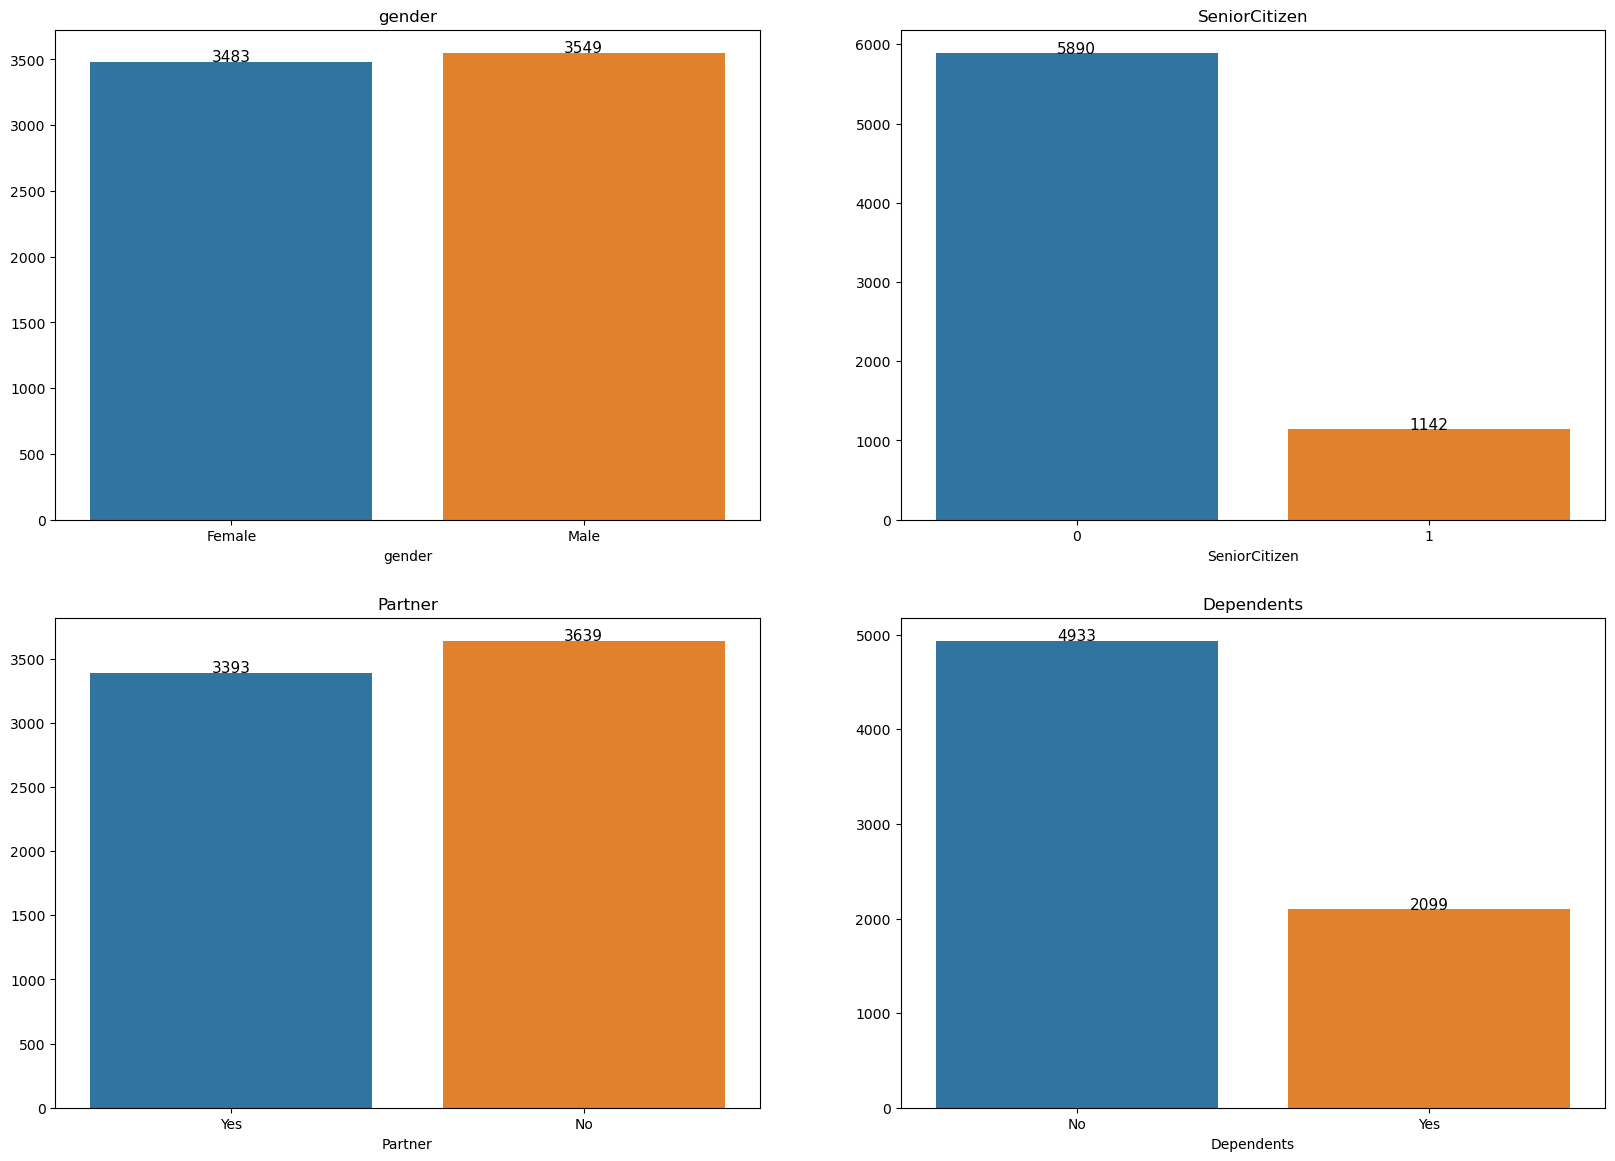

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(20,14))

for i in range(len(g1)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(data=df, x=g1[i])
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2, rect.get_height()+2,
                rect.get_height(), horizontalalignment='center', fontsize=11)
    ax.set_title(g1[i])
    ax.set_ylabel(None)

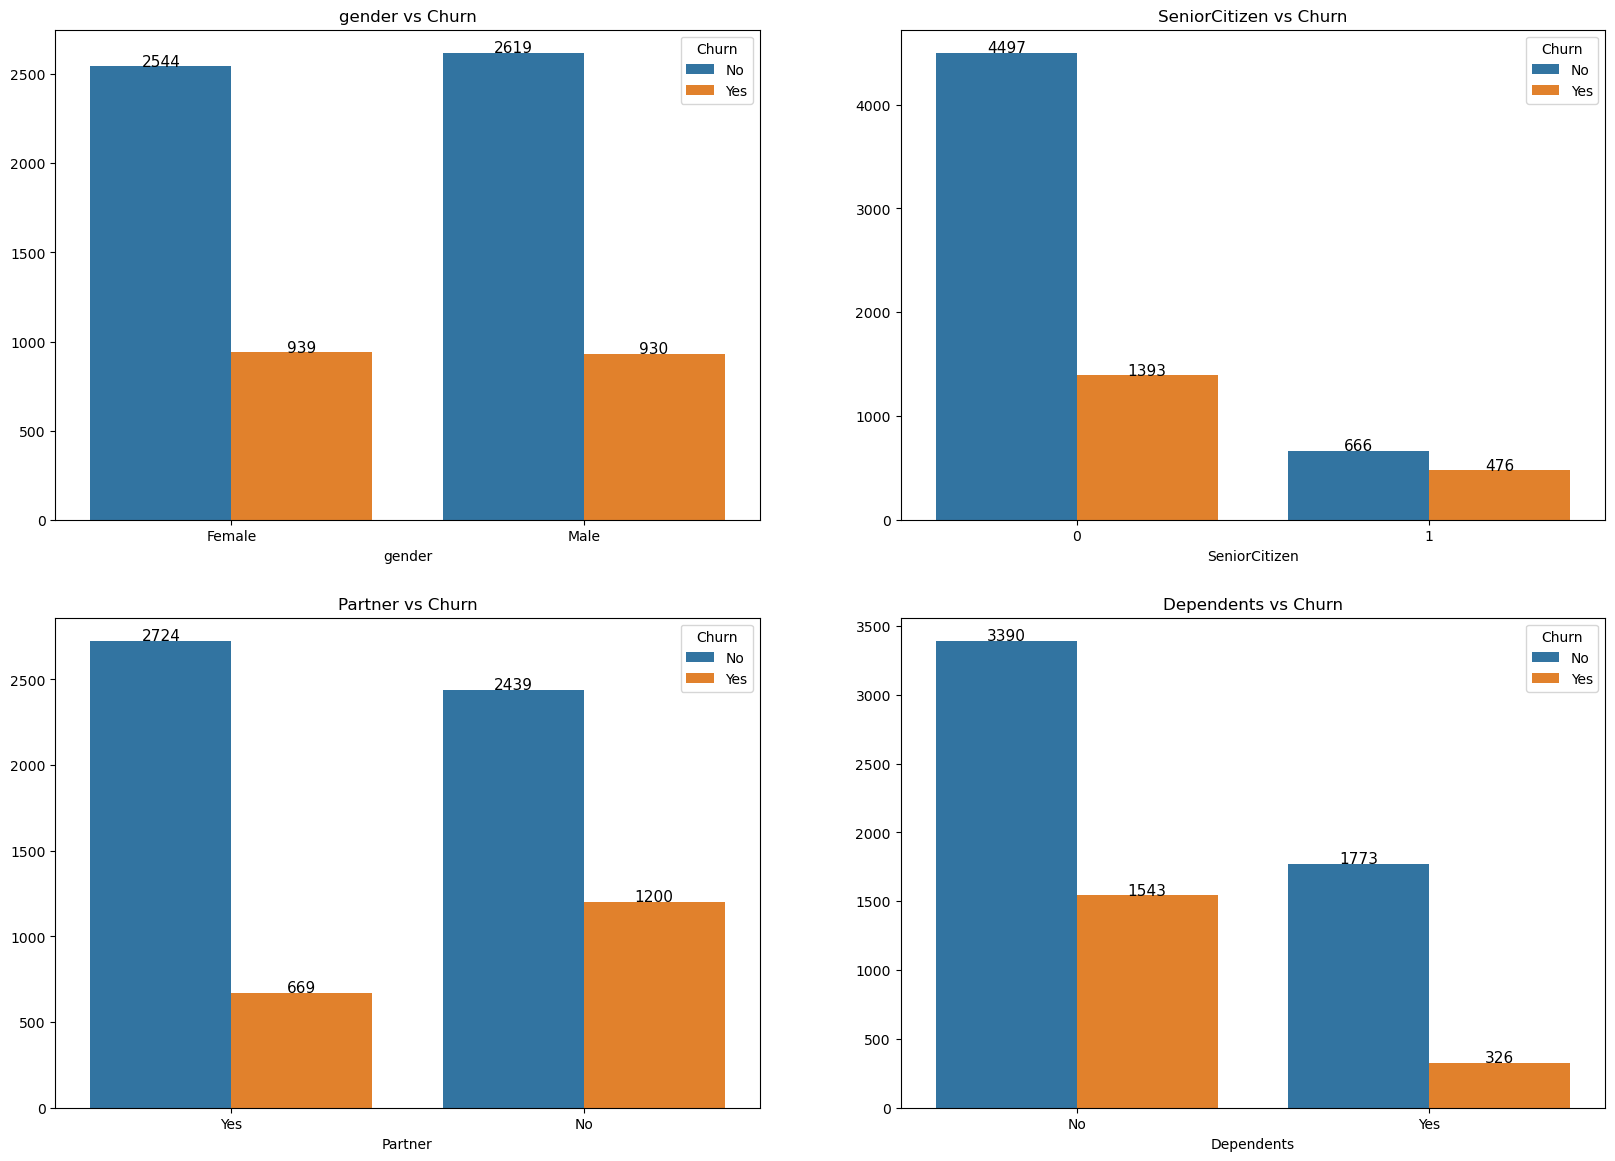

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(20,14))

for i in range(len(g1)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(data=df, x=g1[i], hue='Churn')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2, rect.get_height()+2,
                rect.get_height(), horizontalalignment='center', fontsize=11)
    ax.set_title(g1[i] + ' vs Churn')
    ax.set_ylabel(None)

**Nhận xét**
- **gender**: Số lượng nam và nữ trong bộ data này khá cân bằng với nhau. Số khách hàng rời bỏ xét theo nam và nữ cũng tương đồng nhau
- **SeniorCitizen**: Phần lớn khách hàng không phải là Senior Citizen tại địa điểm thu thập dữ liệu. Số khách hàng rời bỏ ở nhóm Senior Citizen cũng nhiều hơn gần 3 lần so với nhóm Senior Citizen
- **Partner**: Lượng khách hàng không có Partner chỉ nhỉnh hơn nhóm có Partner một chút, không nhiều. Tuy nhiên, số khách rời bỏ ở nhóm không có Partner lại nhiều hơn gần 2 lần so với nhóm có Partner
- **Dependents**: Số khách hàng không có Dependents (người phụ thuộc) nhiều hơn 2 lần so với nhóm có Dependents. Số khách rời bỏ ở nhóm không Dependents nhiều hơn khoảng 3 lần so với nhóm có Dependents

**Group 2: Services**

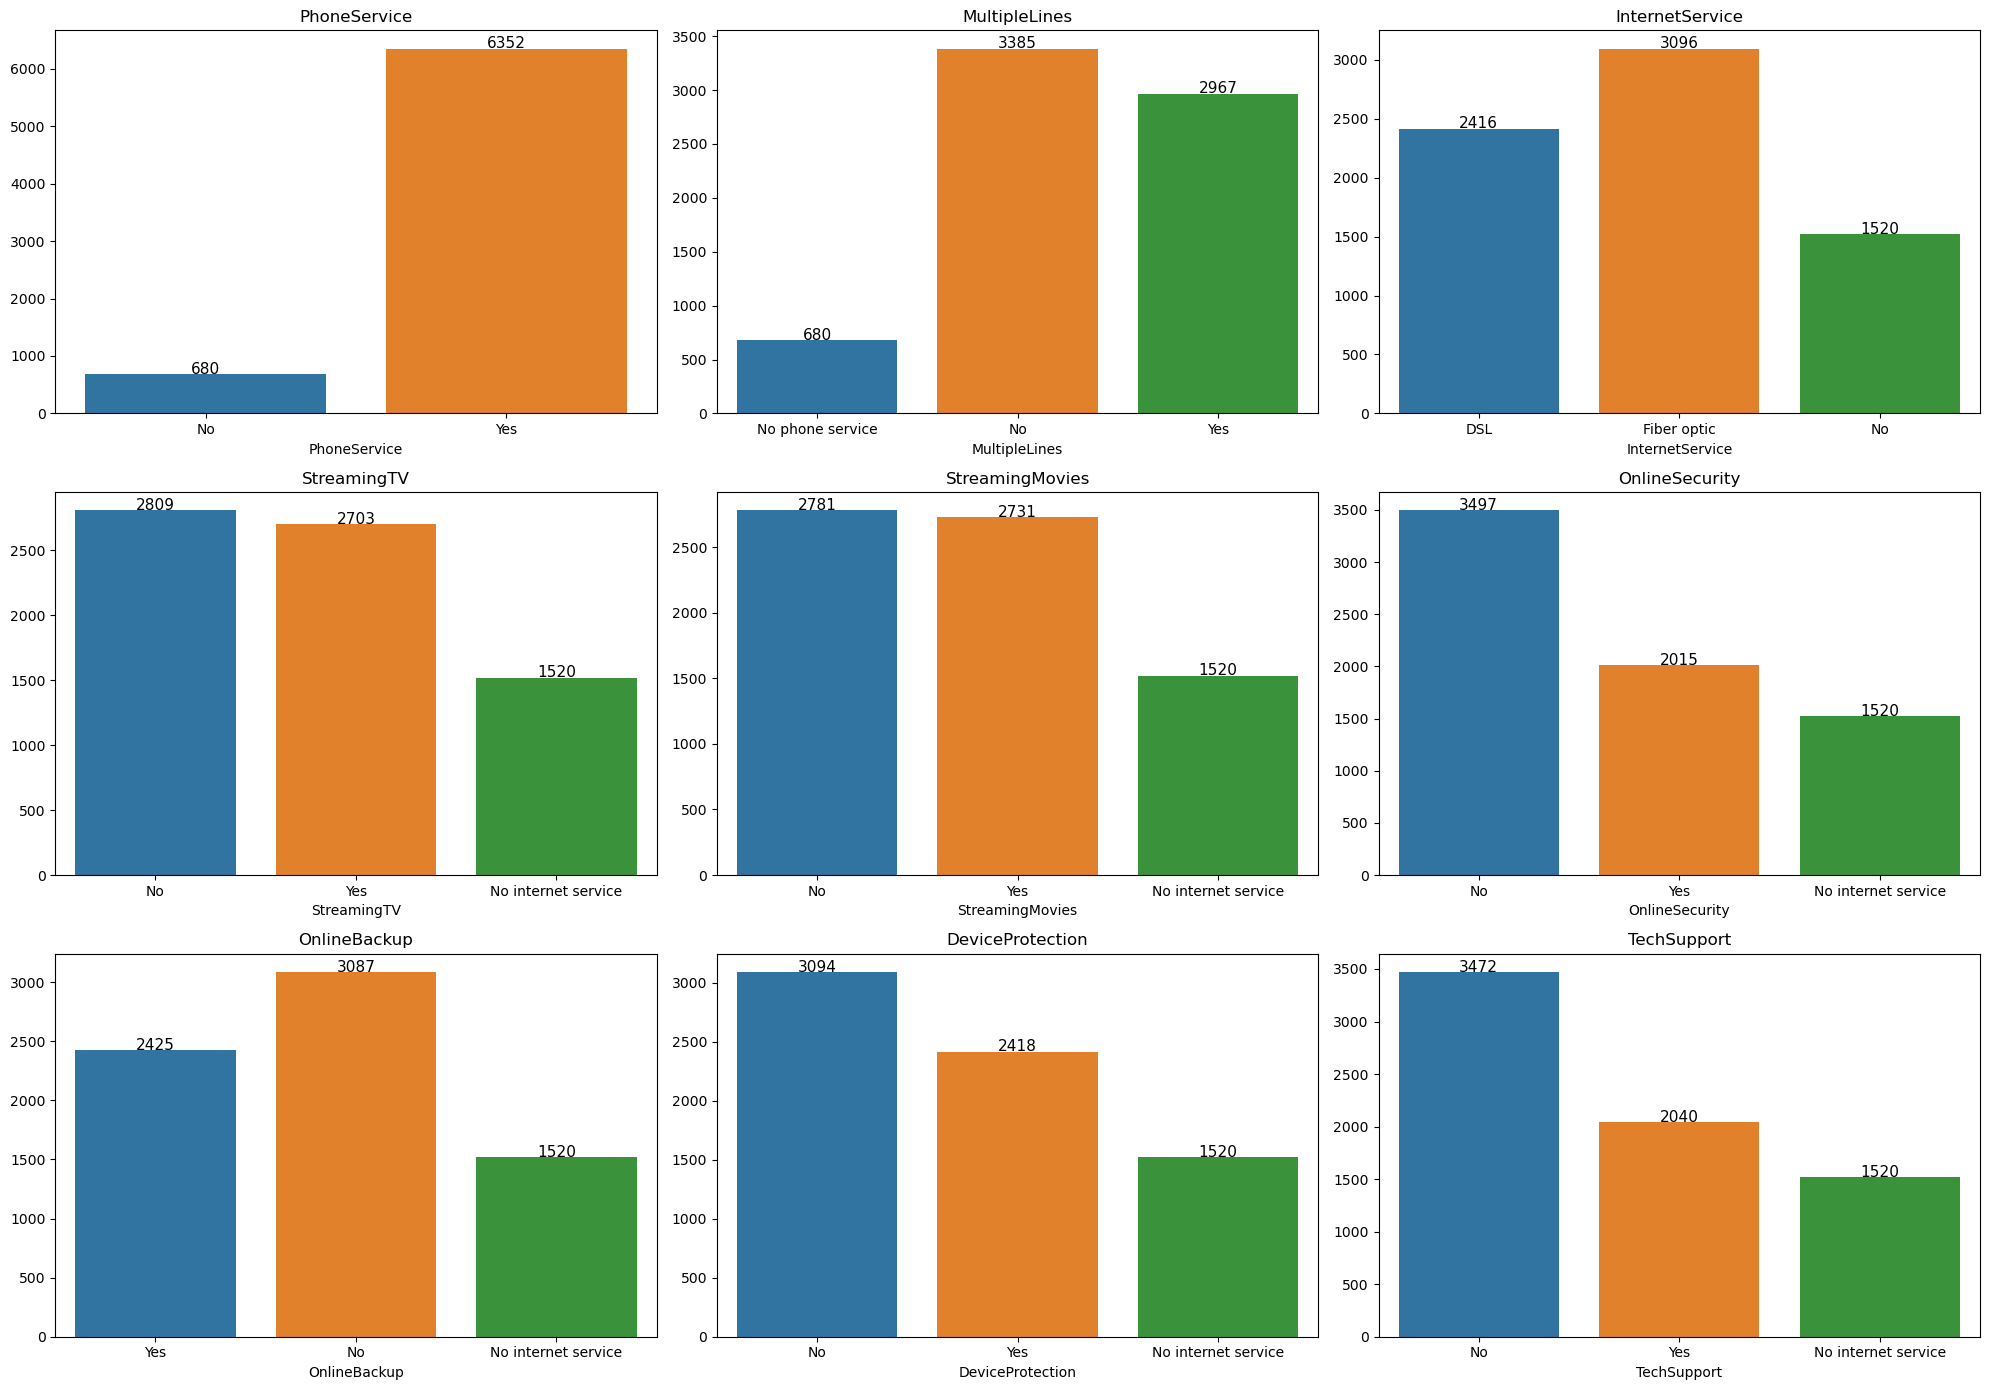

In [25]:
fig, ax = plt.subplots(3, 3, figsize=(20,14))

for i in range(len(g2)):
    plt.subplot(3,3,i+1)
    ax = sns.countplot(data=df, x=g2[i])
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2, rect.get_height()+2,
                rect.get_height(), horizontalalignment='center', fontsize=11)
    ax.set_title(g2[i])
    ax.set_ylabel(None)
    plt.tight_layout()
    

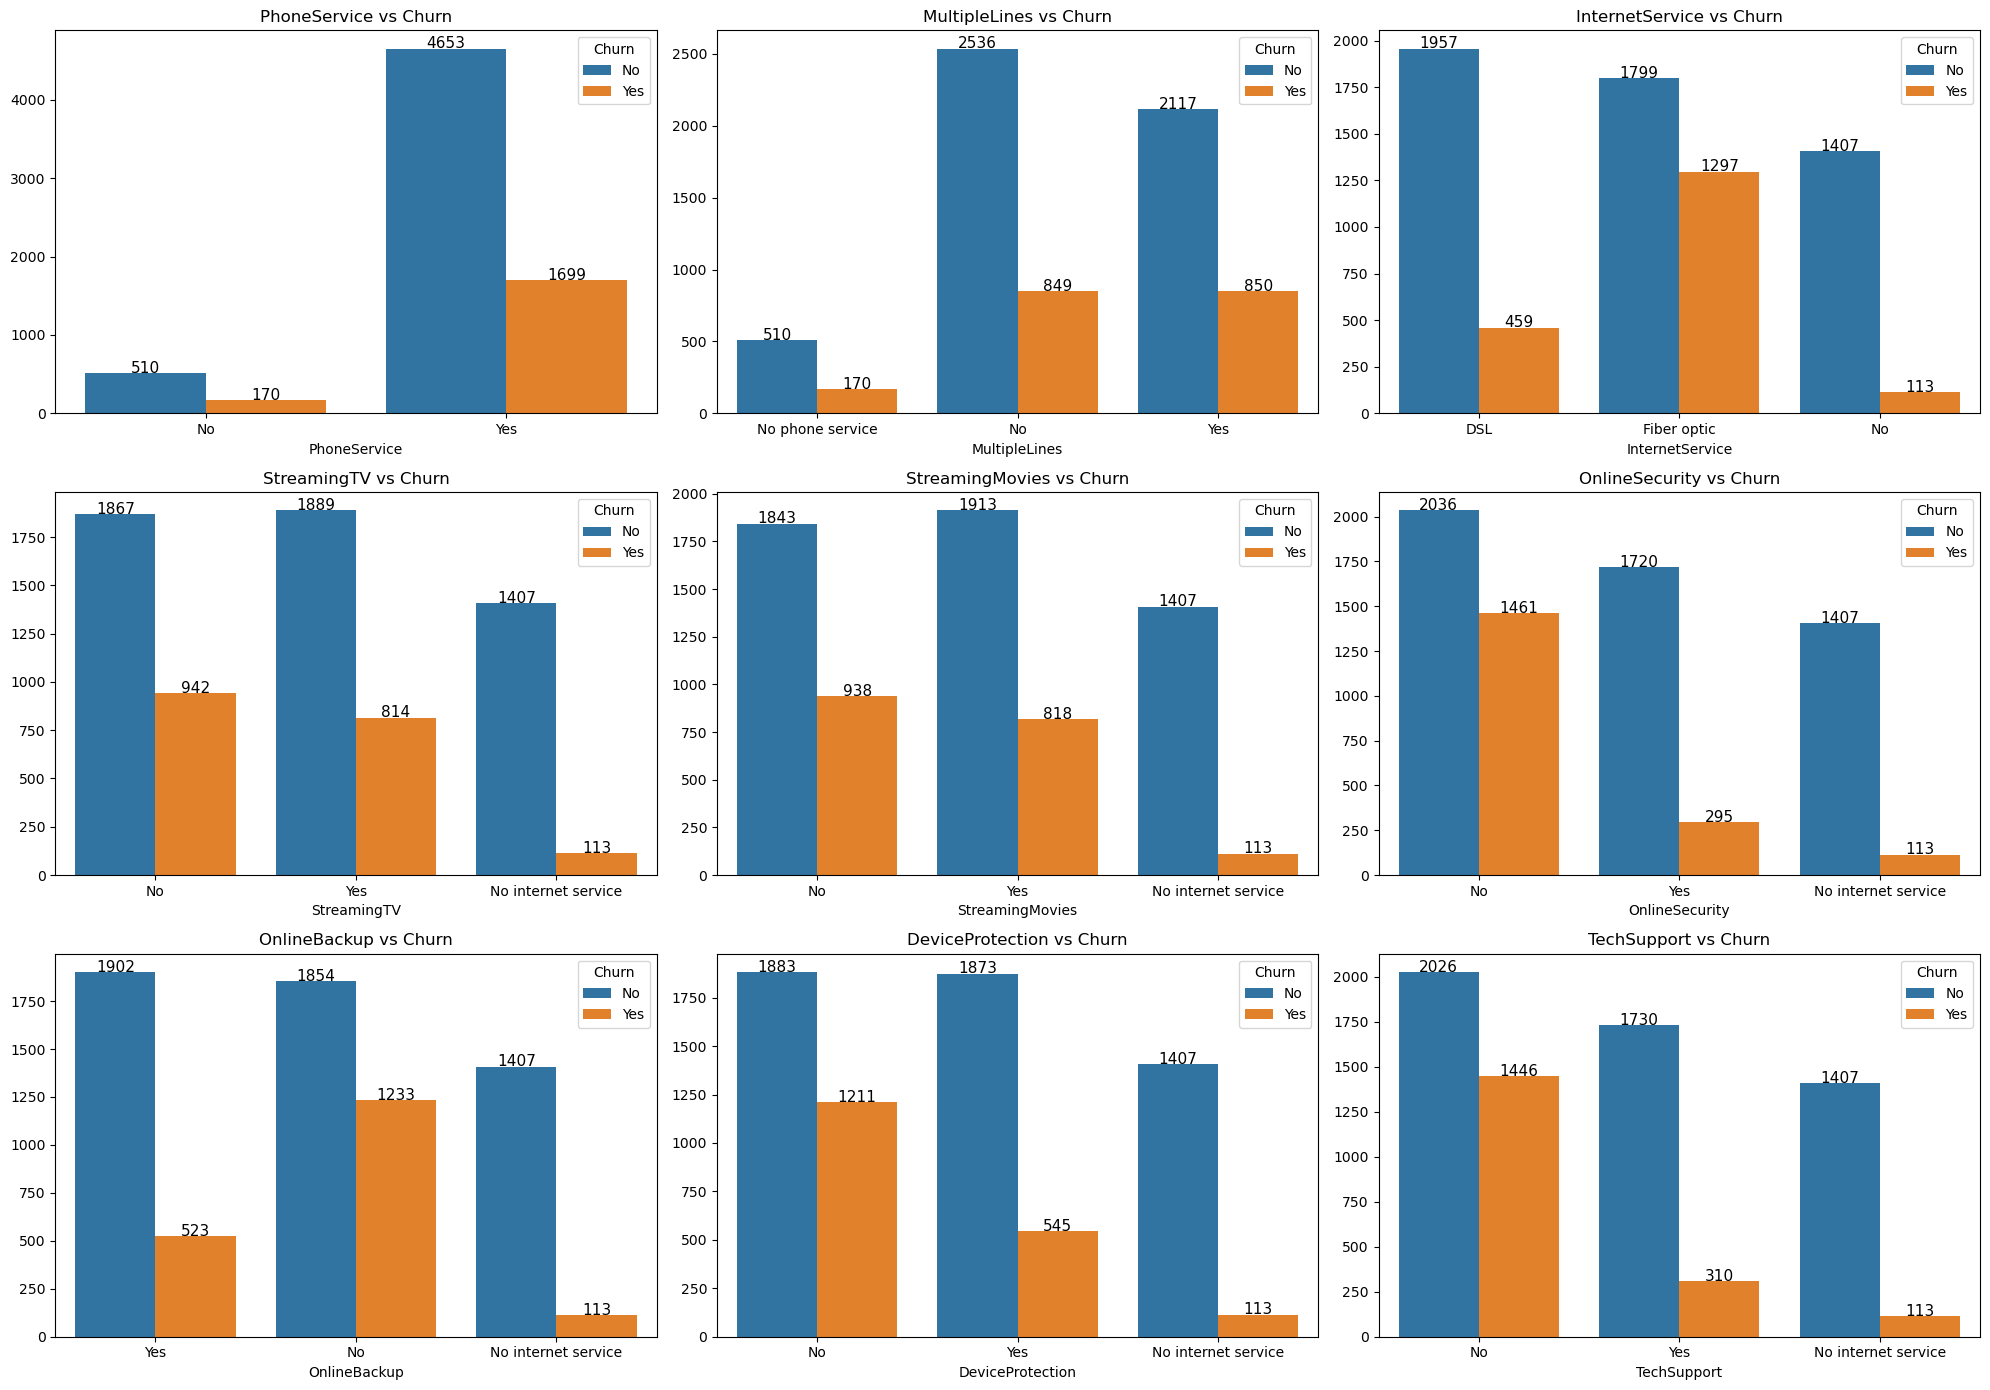

In [26]:
fig, ax = plt.subplots(3, 3, figsize=(20,14))

for i in range(len(g2)):
    plt.subplot(3,3,i+1)
    ax = sns.countplot(data=df, x=g2[i], hue='Churn')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2, rect.get_height()+2,
                rect.get_height(), horizontalalignment='center', fontsize=11)
    ax.set_title(g2[i] + ' vs Churn')
    ax.set_ylabel(None)
    plt.tight_layout()

**Nhận xét**

- **PhoneService**: Số khách có sử dụng PhoneService chiếm đa phần. Lượng khách rời bỏ cũng chủ yếu là những người có dùng PhoneService
- **MultipleLines**: Phần lớn khách hàng có hoặc không sử dụng dịch vụ này. Chỉ có lượng ít khách hàng là không có bất kỳ Phone Service nào. Lượng khách rời bỏ tập trung ở khách có hoặc không dùng dịch vụ này và tỷ lệ tương đương nhau. Số khách rời bỏ ở khách không dùng Phone Servcie chiếm tỷ lệ ít.
- **InternetService**: Fiber optic có số khách hàng nhiều nhất và cũng chiếm đa số những khách hàng rời bỏ. DSL có số khách hàng mặc dù không bằng Fiber optic nhưng lại có số khách rời bỏ ít hơn. Có vẻ nhiều khách hàng ưa thích dịch vụ này. Số khách hàng không dùng dịch vụ này chiếm ít hơn 2 nhóm trên và tỷ lệ rời bỏ cũng thấp.
- **StreamingTV**: Phần lớn khách hàng tập trung ở 2 nhóm có hoặc không sử dụng dịch vụ này, nhóm không dùng dịch vụ chiếm số lượng ít hơn gần 1 nửa. Khách hàng rời bỏ cũng chủ yếu ở 2 nhóm có hoặc không dùng dịch vụ và có phân bố tương đương nhau
- **StreamingMovies**: có phân bố tương tự với StreamingTV
- **OnlineSecurity**: Đa phần khách hàng không sử dụng dịch vụ này và số khách rời bỏ ở nhóm này chiếm tỷ lệ cao. Lượng khách có sử dụng dịch vụ này và khách không có Internet Service có tỷ lệ khách rời bỏ thấp.
- **OnlineBackup**: Đa phần khách hàng không sử dụng dịch vụ này và số khách rời bỏ ở nhóm này chiếm tỷ lệ cao. Khách hàng có sử dụng dịch vụ này thì lượng rời bỏ ít hơn nhiều so với khách ở lại. Nhóm không có Internet Service có tỷ lệ rời bỏ thấp.
- **DeviceProtection**: Phân bố tương tự với **OnlineSecurity** và **OnlineBackup**
- **TechSupport**: Phân bố tương tự với **OnlineSecurity, OnlineBackup và DeviceProtection**

**Group 3: Payment information**

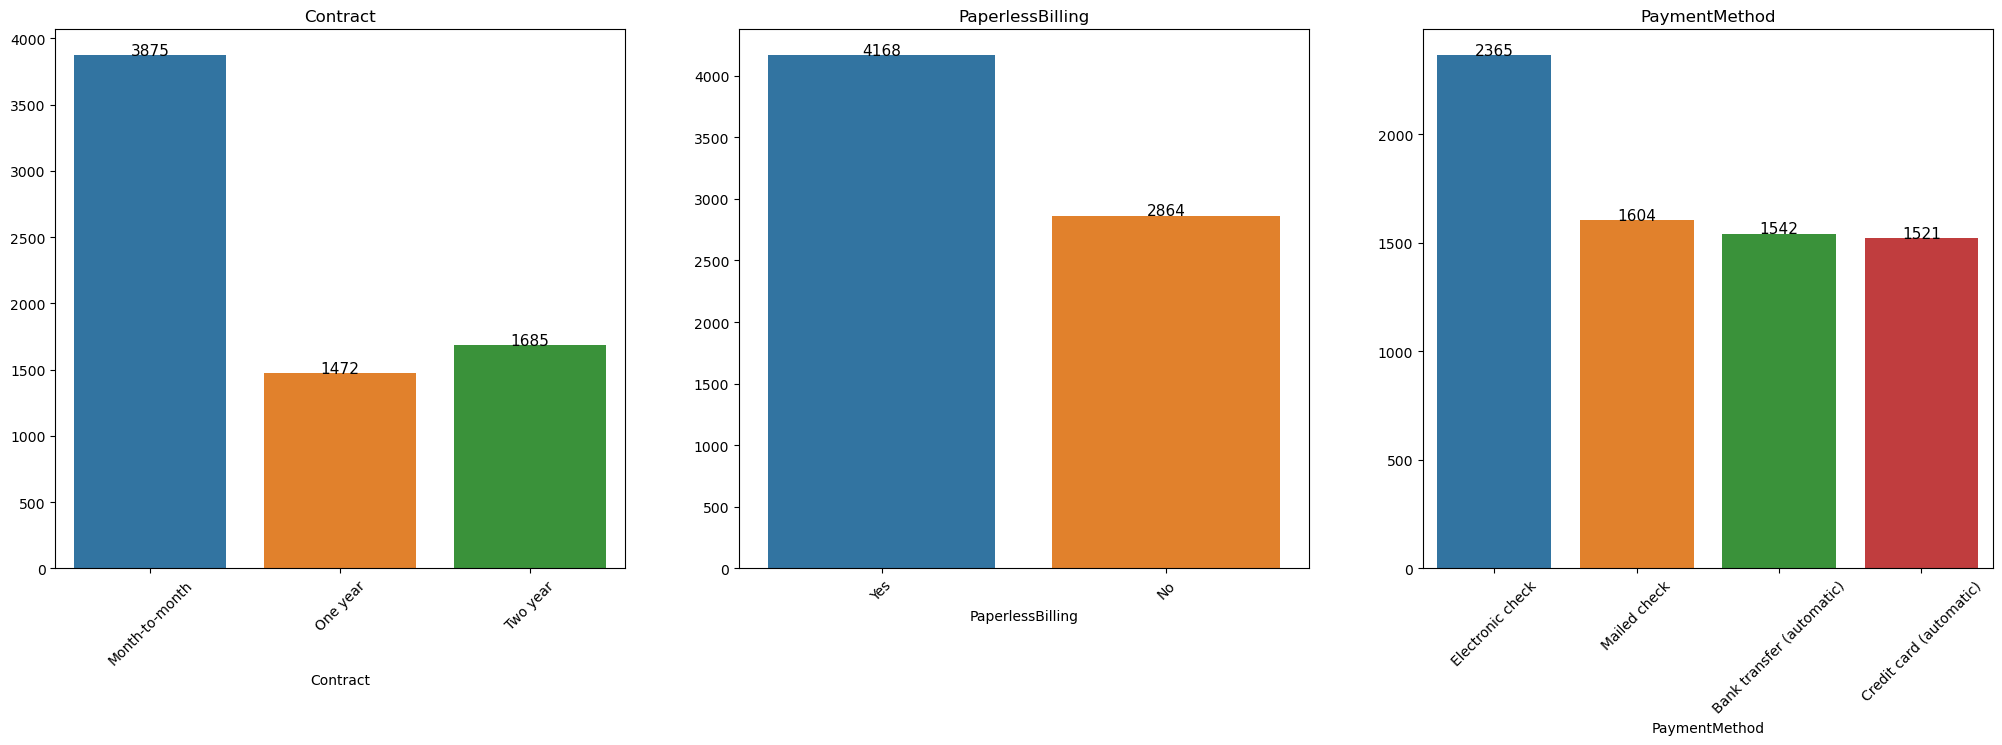

In [27]:
fig, ax = plt.subplots(1,3,figsize=(25,7))

for i in range(len(g3)):
    plt.subplot(1,3,i+1)
    ax = sns.countplot(data=df, x=g3[i])
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2, rect.get_height()+2,
                rect.get_height(), horizontalalignment='center', fontsize=11)
    ax.set_title(g3[i])
    ax.set_ylabel(None)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

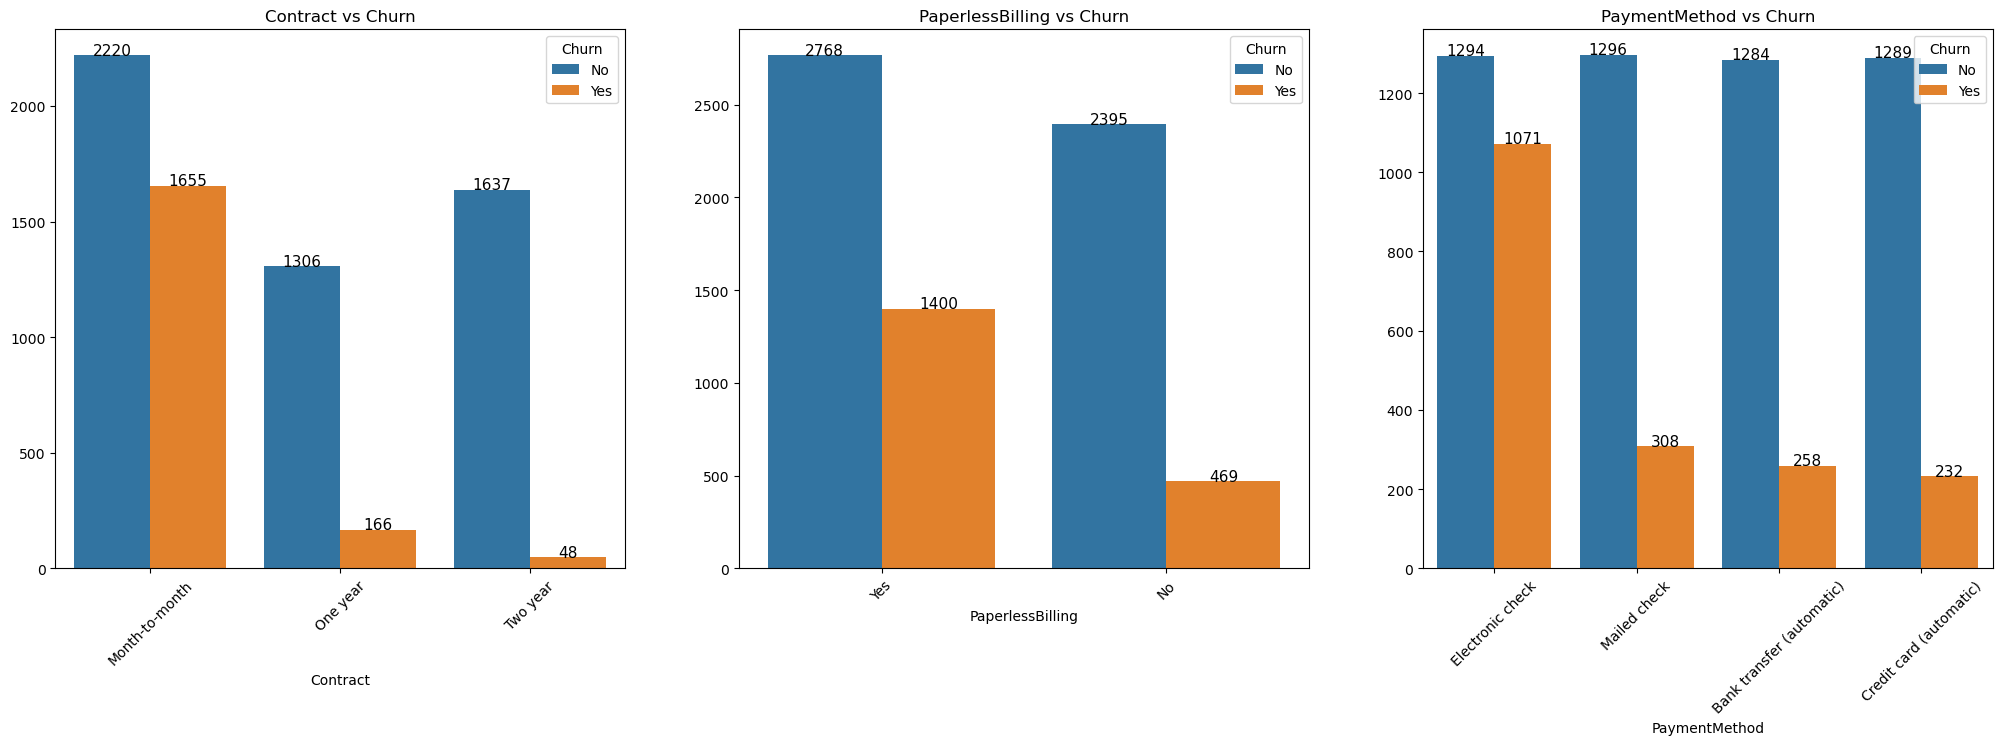

In [28]:
fig, ax = plt.subplots(1,3,figsize=(25,7))

for i in range(len(g3)):
    plt.subplot(1,3,i+1)
    ax = sns.countplot(data=df, x=g3[i], hue='Churn')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2, rect.get_height()+2,
                rect.get_height(), horizontalalignment='center', fontsize=11)
    ax.set_title(g3[i] + ' vs Churn')
    ax.set_ylabel(None)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.tight_layout;

**Nhận xét**
- **Contract**: hợp đồng Month-to-Month chiếm đa số, 2 loại hợp đồng 1 năm và 2 năm có số lượng khá tương đương nhau và nhỏ hơn 1 nửa so với loại Month-to-month. Khách hàng rời bỏ chủ yếu ở hợp đồng Month-to-month
- **PaperlessBilling**: Số khách hàng không sử dụng hóa đơn giấy nhiều hơn so với nhóm sử dụng hóa đơn giấy. Số khách hàng rời bỏ  bằng một nửa so với nhóm khách ở lại ở khách hàng không dùng hóa đơn giấy. Tỷ lệ rời bỏ với khách không dùng hóa đơn giấy cao hơn nhiều so với nhóm khách sử dụng hóa đơn giấy
- **PaymentMethod**: hình thức được sử dụng nhiều nhất là Electionic check, các hình thức còn lại có số lượng tương đương nhau. Tỷ lệ khách rời bỏ ở nhóm sử dụng Electionic check là rất cao, ở những hình thức còn lại tương đối thấp và không khác biệt quá nhiều

## 2.2 Numerical Features

In [29]:
# Function biểu đồ phân phối
def plot_dist(df, feature, target=False):
    if target:
        sns.displot(data=df, x=feature, kde=True, hue='Churn')
        plt.title(feature + ' distribution')
        plt.ylabel(None);
    else:
        sns.displot(data=df, x=feature, kde=True)
        plt.title(feature + ' distribution')
        plt.ylabel(None);
        
# Function biểu đồ boxplot
def plot_box(df, feature, target=False):
    if target:
        sns.boxplot(data=df, x='Churn', y=feature)
        plt.title(feature + ' vs Churn')
        plt.ylabel(None);
    else:
        sns.boxplot(data=df, x=feature)
        plt.title(feature + ' distribution')
        plt.ylabel(None);

### tenure

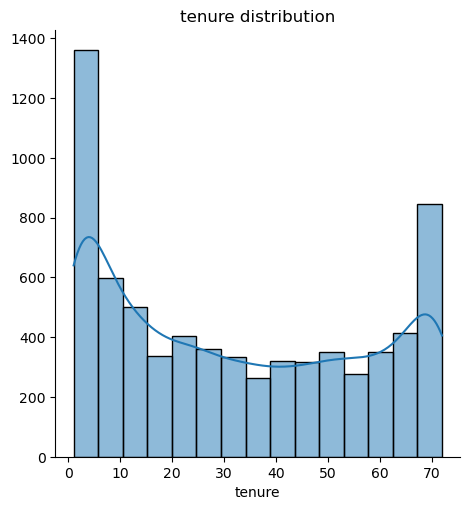

In [30]:
plot_dist(df, 'tenure')

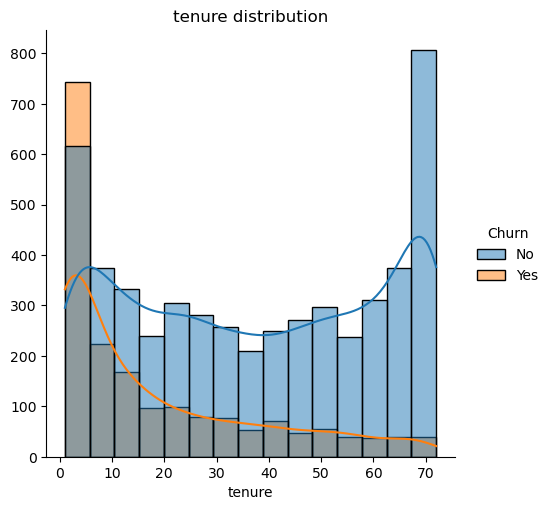

In [31]:
plot_dist(df, 'tenure', target=True)

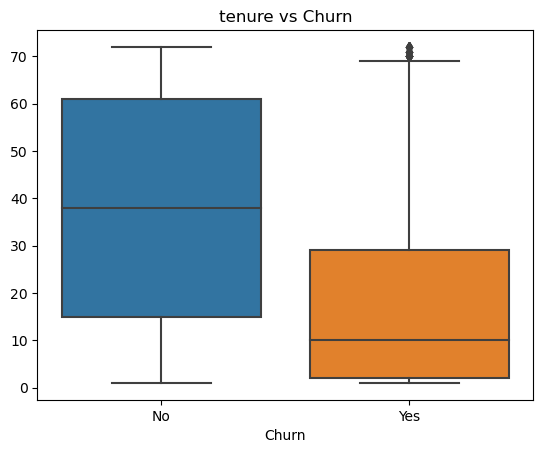

In [32]:
plot_box(df, 'tenure', target=True)

- khách hàng có số tháng sử dụng trong khoảng 1-5 tháng và khoảng 70 tháng có số lượng lớn
- Đặc biệt nhóm có thời gian sử dụng 1-5 tháng có số khách rời bỏ nhiều hơn số khách ở lại
- Số lượng khách rời bỏ giảm dần khi thời gian sử dụng tăng lên
- Khách hàng rời bỏ tập trung nhiều ở nhóm có thời gian sử dụng nhỏ hơn 30 tháng

### MonthlyCharges

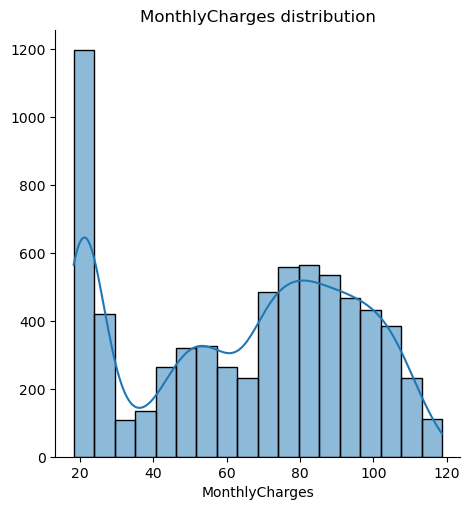

In [33]:
plot_dist(df, 'MonthlyCharges')

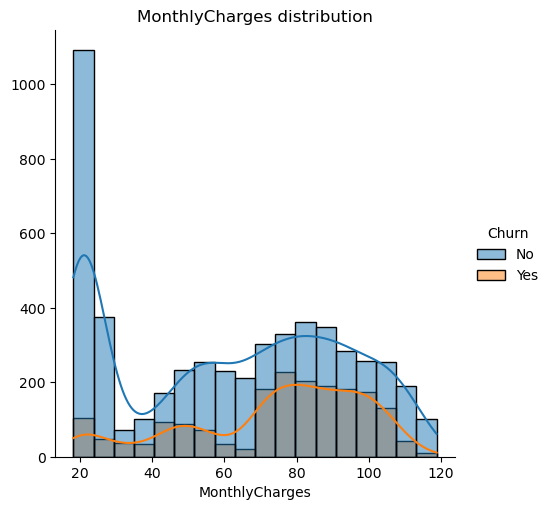

In [34]:
plot_dist(df, 'MonthlyCharges', target=True)

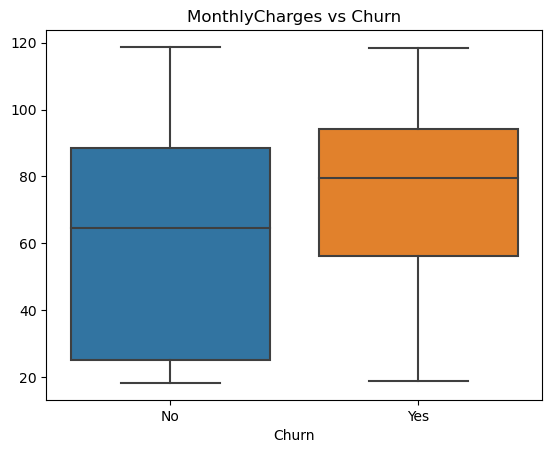

In [35]:
plot_box(df, 'MonthlyCharges', target=True)

- Có rất nhiều khách hàng có chi phí hàng tháng ở mức khoảng 20, tuy nhiên tỷ lệ rời bỏ ở nhóm này không thật sự cao
- Phần lớn khách hàng có chi phí hàng tháng từ khoảng 40 - hơn 100
- Khách hàng rời bỏ tập trung ở mức 40-60 và 65-105

### TotalCharges

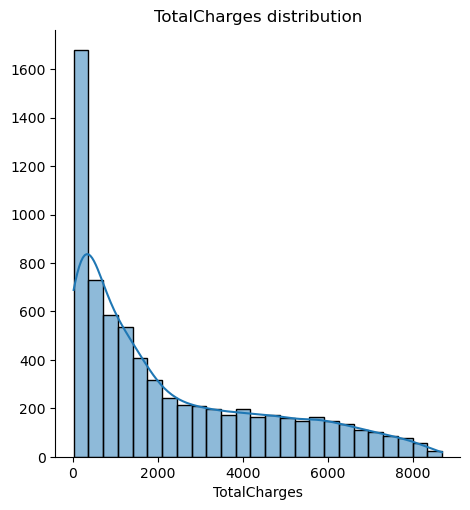

In [36]:
plot_dist(df, 'TotalCharges')

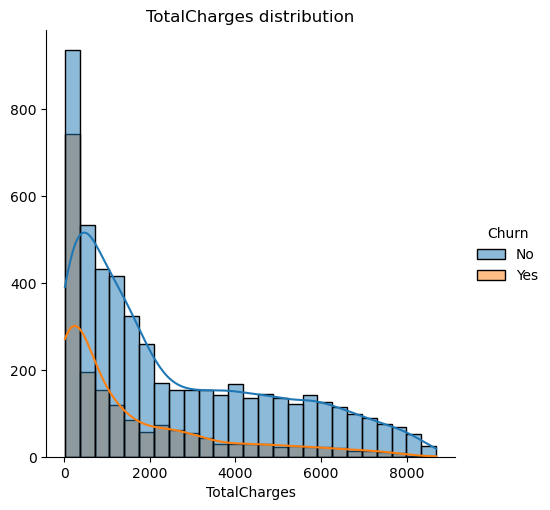

In [37]:
plot_dist(df, 'TotalCharges', target=True)

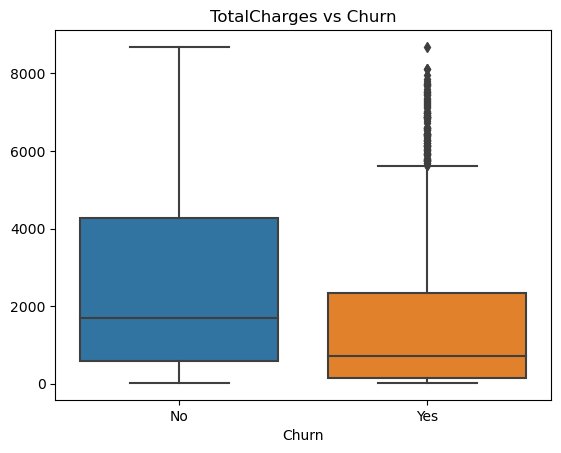

In [38]:
plot_box(df, 'TotalCharges', target=True)

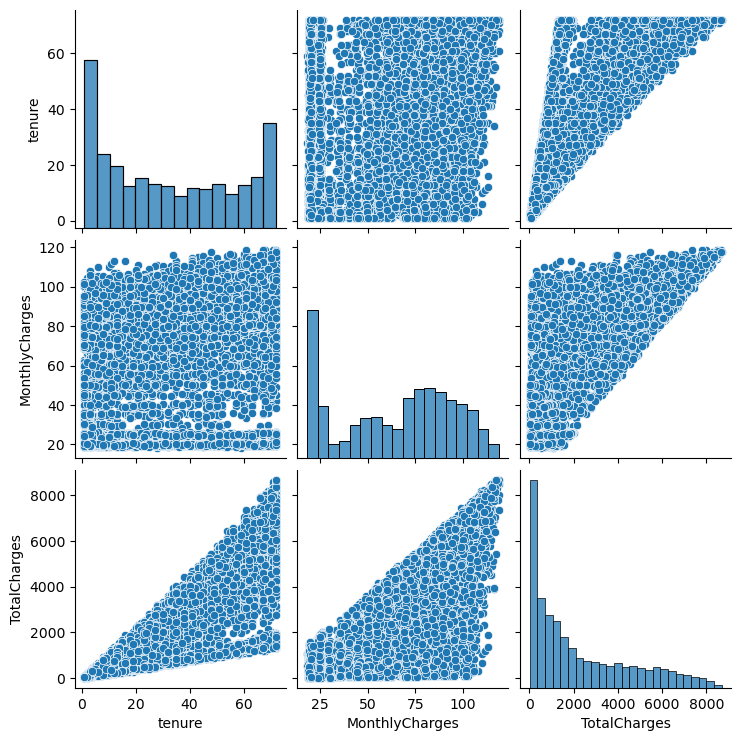

In [39]:
sns.pairplot(data=df[num_features])

**Nhận xét**

- Khách hàng có tổng chi phí khoảng từ 0-350 có số lượng nhiều vượt trội so với các nhóm khác và tỷ lệ rời bỏ ở nhóm này cùng rất cao
- Nhóm có tổng chi phí khoảng từ 0-1000 có tỷ lệ khách rời bỏ cao
- Lượng khách rời bỏ giảm dần khi tổng chi phí tăng dần
- `MothlyCharges` và `TotalCharges`,`tenure` và `TotalCharges` có mối tương quan với nhau

## Summary of EDA

**Các features và tác động của các giá trị tới churn customers**

**1. Categorical features**
- **gender**: Male = Female
- **SeniorCitizen**: No SeniorCitizen > Senior Citizen
- **Partner**: No partner > Partner
- **Dependents**: No Dependent > Dependent
- **PhoneService**: PhoneService > No PhoneService
- **MultipleLines**: MultipleLines > No MultipleLines > No PhoneService
- **InternetService**: Fiber Optic > DSL > No InternetService
- **OnlineSecurity**: No > Yes > No InternetService
- **OnlineBackup**: No > Yes > No InternetService
- **DeviceProtection**: No > Yes > No InternetService
- **TechSupport**: No > Yes > No InternetService
- **StreamingTV**: No > Yes > No InternetService
- **StreamingMovies**: No > Yes > No InternetService
- **Contract**: Month-to-month > One year > two year    
- **PaperlessBilling**: Yes > No
- **PaymentMethod**: Electronic check > Mailed check > Bank Transfer (automatic) > Credit Card (automatic)


**2. Numerical features**

- **tenure**: 1-5 tháng
- **MonthlyCharges**: 40-60 và 65-105
- **TotalCharges**: 0-1000

---

# III. Feature Engineering | Feature Selection

In [40]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

In [41]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [42]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


<AxesSubplot:>

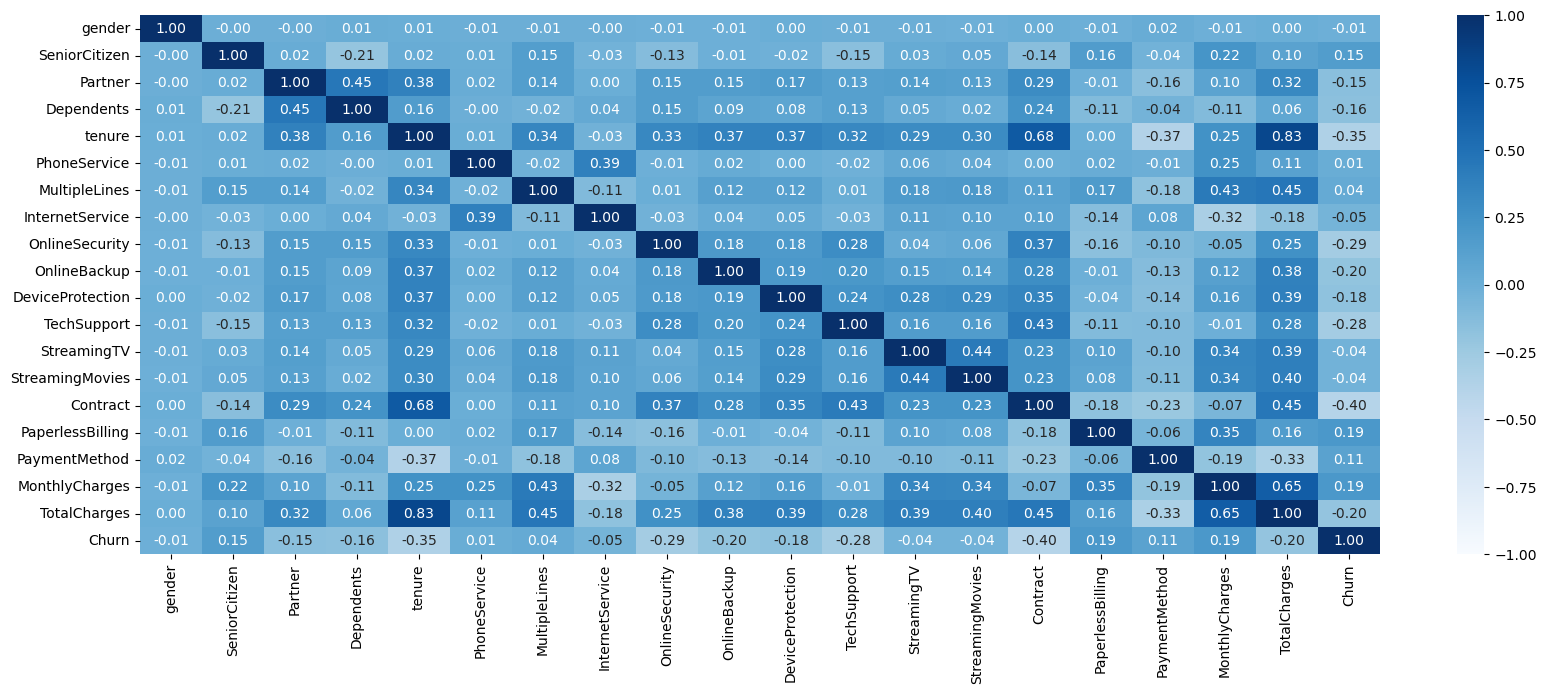

In [43]:
plt.figure(figsize=(20,7))

sns.heatmap(data=df.corr(), annot=True, cmap='Blues', fmt='.2f',
            vmin=-1, vmax=1)

In [44]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

### 1. Feature Selection for Categorical Features

**Chi-Squared Test**

In [45]:
features = df.loc[:, cat_features]
target = df.loc[:, 'Churn']

best_features = SelectKBest(score_func=chi2, k='all')
fit_in = best_features.fit(features, target)

scores = pd.DataFrame(data=fit_in.scores_, index=list(features.columns), columns=['Chi-Squared Score'])
scores.sort_values(by='Chi-Squared Score',ascending=False)

,Chi-Squared Score
Contract,1111.759054
OnlineSecurity,550.437364
TechSupport,522.164716
OnlineBackup,229.441123
DeviceProtection,190.688004
SeniorCitizen,133.482766
Dependents,131.271509
PaperlessBilling,104.979224
Partner,81.857769
PaymentMethod,59.240507


### 2. Feature Selection for Numerical Features

**ANOVA Test**

In [46]:
features = df.loc[:, num_features]
target = df.loc[:, 'Churn']

best_features = SelectKBest(score_func=f_classif, k='all')
fit_in = best_features.fit(features, target)

scores = pd.DataFrame(data=fit_in.scores_, index=list(features.columns), columns=['ANOVA Score'])
scores.sort_values(by='ANOVA Score',ascending=False)

,ANOVA Score
tenure,1007.509431
TotalCharges,291.344862
MonthlyCharges,271.576990


**Từ kết quả của ma trận tương quan, Chi-Squared Test và ANOVA Test có nhận xét:**
- Loại bỏ các features: `PhoneService, gender, StreamingTV, StreamingMovies, InternetService, MultipleLines` do có tương quan yếu với biến target Churn và có điểm Chi-Squared Test thấp
- Loại biến `TotalCharges` do có tương quan mạnh với biến tenure và biến này cũng không có điểm ANOVA Test cao nhất

In [47]:
df.drop(['PhoneService', 'gender', 'StreamingTV', 'StreamingMovies', 'InternetService', 'MultipleLines', 'TotalCharges'], 
        axis=1, inplace=True)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,0,1,0,2,0,0,0,1,2,29.85,0
1,0,0,0,34,2,0,2,0,1,0,3,56.95,0
2,0,0,0,2,2,2,0,0,0,1,3,53.85,1
3,0,0,0,45,2,0,2,2,1,0,0,42.30,0
4,0,0,0,2,0,0,0,0,0,1,2,70.70,1


### 3. Handling imbalanced dataset

In [48]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [49]:
smote= SMOTE(sampling_strategy=0.85)
X_res, y_res= smote.fit_resample(X, y)

print('Original target shape {}'.format(Counter(y)))
print('Resampled target shape {}'.format(Counter(y_res)))

Original target shape Counter({0: 5163, 1: 1869})
Resampled target shape Counter({0: 5163, 1: 4388})


### 4. Split dataset

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42) 

### 5. Scale numerical features

In [51]:
scaler = StandardScaler()
num_features.remove('TotalCharges')

In [52]:
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

---

# IV. Modeling

In [53]:
from sklearn.svm import LinearSVC, SVC
from sklearn. neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score, precision_score
from sklearn.metrics import roc_auc_score, plot_roc_curve

#### 1. Logistic Regression

Accruracy: 0.7817896389324961
Recall: 0.7853881278538812
Precision: 0.7502726281352236
F1 score: 0.7674288901282766
roc auc score: 0.782066044603269
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1035
           1       0.75      0.79      0.77       876

    accuracy                           0.78      1911
   macro avg       0.78      0.78      0.78      1911
weighted avg       0.78      0.78      0.78      1911



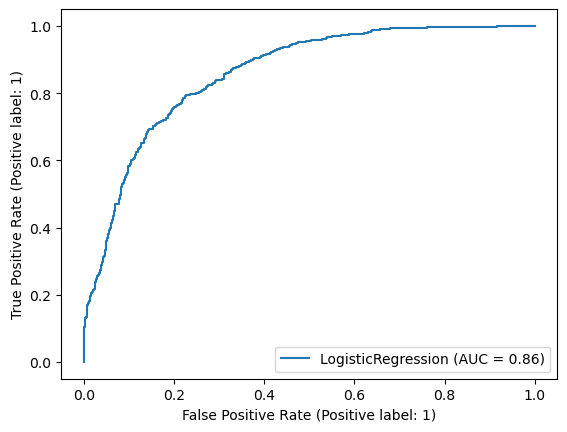

In [54]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000, random_state=2023)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print('Accruracy: {}'.format(accuracy_score(y_test, y_pred)))
print('Recall: {}'.format(recall_score(y_test, y_pred)))
print('Precision: {}'.format(precision_score(y_test, y_pred)))
print('F1 score: {}'.format(f1_score(y_test, y_pred)))
print('roc auc score: {}'.format(roc_auc_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))
plot_roc_curve(log_reg, X_test, y_test)

<AxesSubplot:>

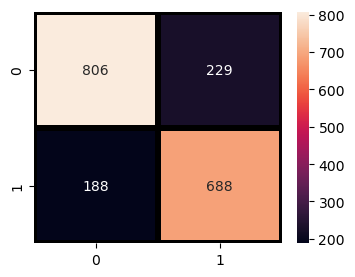

In [55]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

#### 2. Random Forest

Accruracy: 0.8288854003139717
Recall: 0.8013698630136986
Precision: 0.8210526315789474
F1 score: 0.8110918544194108
roc auc score: 0.8267718880285884
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1035
           1       0.82      0.80      0.81       876

    accuracy                           0.83      1911
   macro avg       0.83      0.83      0.83      1911
weighted avg       0.83      0.83      0.83      1911



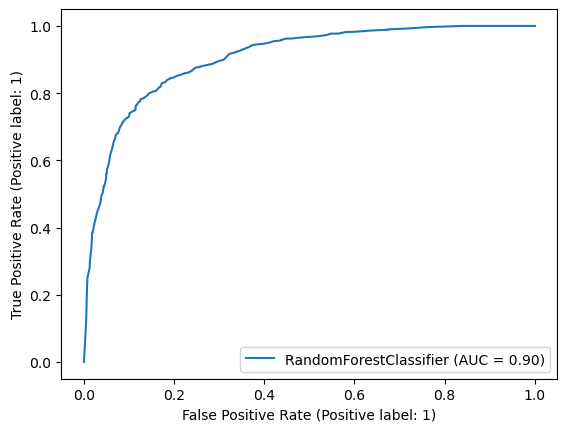

In [56]:
rf = RandomForestClassifier(random_state=2023)
rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)

print('Accruracy: {}'.format(accuracy_score(y_test, y_pred2)))
print('Recall: {}'.format(recall_score(y_test, y_pred2)))
print('Precision: {}'.format(precision_score(y_test, y_pred2)))
print('F1 score: {}'.format(f1_score(y_test, y_pred2)))
print('roc auc score: {}'.format(roc_auc_score(y_test, y_pred2)))
print(classification_report(y_test, y_pred2))
plot_roc_curve(rf, X_test, y_test)

Text(0.5, 1.0, 'Random Forest confusion matrix')

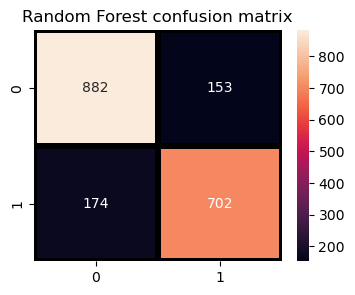

In [57]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred2),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title('Random Forest confusion matrix')

#### 3. SVC

Accruracy: 0.8001046572475143
Recall: 0.7922374429223744
Precision: 0.7762863534675615
F1 score: 0.784180790960452
roc auc score: 0.7995003639732645
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1035
           1       0.78      0.79      0.78       876

    accuracy                           0.80      1911
   macro avg       0.80      0.80      0.80      1911
weighted avg       0.80      0.80      0.80      1911



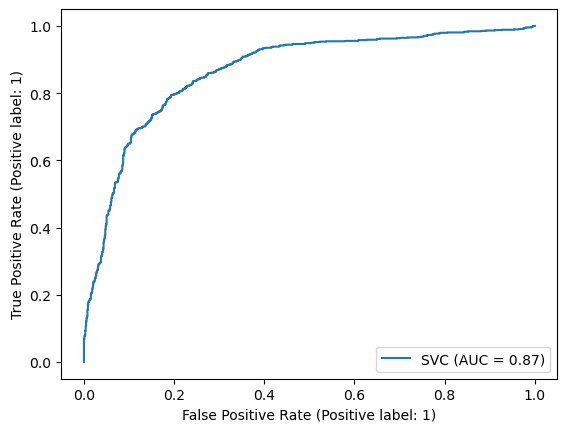

In [74]:
svc = SVC(random_state=2023, probability=True)
svc.fit(X_train, y_train)
y_pred3 = svc.predict(X_test)

print('Accruracy: {}'.format(accuracy_score(y_test, y_pred3)))
print('Recall: {}'.format(recall_score(y_test, y_pred3)))
print('Precision: {}'.format(precision_score(y_test, y_pred3)))
print('F1 score: {}'.format(f1_score(y_test, y_pred3)))
print('roc auc score: {}'.format(roc_auc_score(y_test, y_pred3)))
print(classification_report(y_test, y_pred3))
plot_roc_curve(svc, X_test, y_test)

Text(0.5, 1.0, 'SVC confusion matrix')

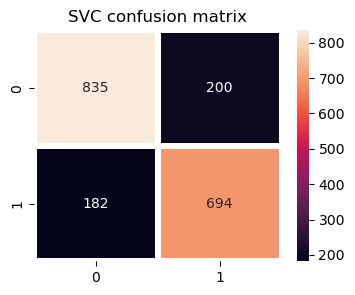

In [59]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred3),
                annot=True,fmt = "d",linecolor="white",linewidths=3)
plt.title('SVC confusion matrix')

**4. Linear SVC**

Accruracy: 0.8001046572475143
Recall: 0.7922374429223744
Precision: 0.7762863534675615
F1 score: 0.784180790960452
roc auc score: 0.7995003639732645
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1035
           1       0.78      0.79      0.78       876

    accuracy                           0.80      1911
   macro avg       0.80      0.80      0.80      1911
weighted avg       0.80      0.80      0.80      1911



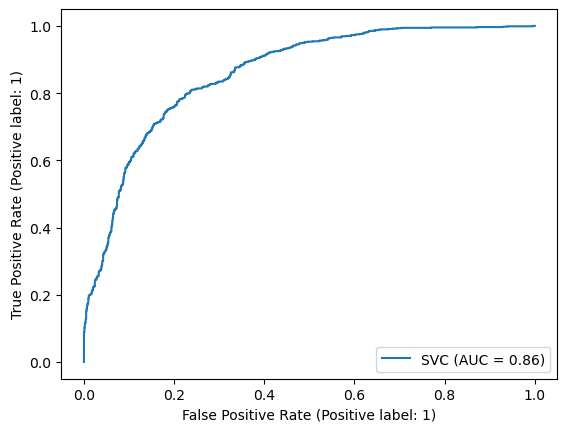

In [76]:
linear_svc = SVC(kernel='linear',probability=True, random_state=2023)
linear_svc.fit(X_train, y_train)
y_pred4 = svc.predict(X_test)

print('Accruracy: {}'.format(accuracy_score(y_test, y_pred4)))
print('Recall: {}'.format(recall_score(y_test, y_pred4)))
print('Precision: {}'.format(precision_score(y_test, y_pred4)))
print('F1 score: {}'.format(f1_score(y_test, y_pred4)))
print('roc auc score: {}'.format(roc_auc_score(y_test, y_pred4)))
print(classification_report(y_test, y_pred4))
plot_roc_curve(linear_svc, X_test, y_test)

Text(0.5, 1.0, 'LinearSVC confusion matrix')

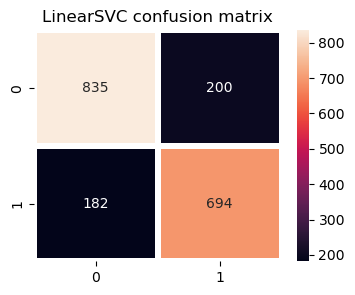

In [61]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred4),
                annot=True,fmt = "d",linecolor="white",linewidths=3)
plt.title('LinearSVC confusion matrix')

#### 5. Decision Tree

Accruracy: 0.7875457875457875
Recall: 0.7659817351598174
Precision: 0.7694954128440367
F1 score: 0.7677345537757436
roc auc score: 0.7858894183045464
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1035
           1       0.77      0.77      0.77       876

    accuracy                           0.79      1911
   macro avg       0.79      0.79      0.79      1911
weighted avg       0.79      0.79      0.79      1911



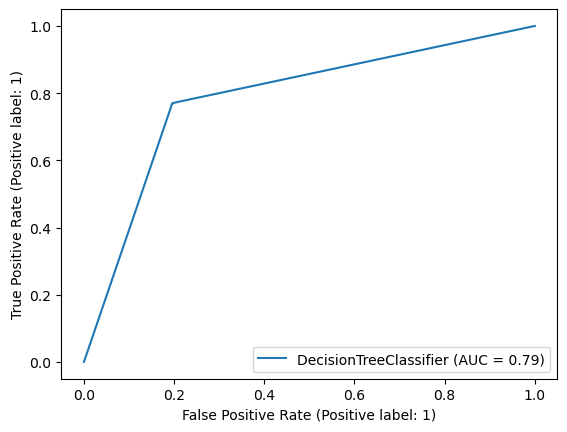

In [62]:
dct = DecisionTreeClassifier(random_state=2023)
dct.fit(X_train, y_train)
y_pred5 = dct.predict(X_test)

print('Accruracy: {}'.format(accuracy_score(y_test, y_pred5)))
print('Recall: {}'.format(recall_score(y_test, y_pred5)))
print('Precision: {}'.format(precision_score(y_test, y_pred5)))
print('F1 score: {}'.format(f1_score(y_test, y_pred5)))
print('roc auc score: {}'.format(roc_auc_score(y_test, y_pred5)))
print(classification_report(y_test, y_pred5))
plot_roc_curve(dct, X_test, y_test)

Text(0.5, 1.0, 'Decision Tree confusion matrix')

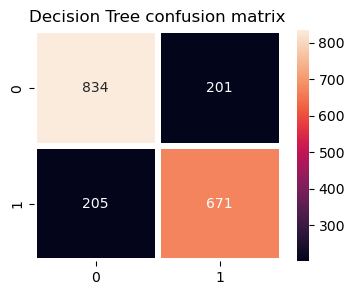

In [63]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred5),
                annot=True,fmt = "d",linecolor="white",linewidths=3)
plt.title('Decision Tree confusion matrix')

**6. K-Nearest Neighbours (KNN)**

Accruracy: 0.7870225013082156
Recall: 0.7853881278538812
Precision: 0.7585446527012127
F1 score: 0.7717330342120022
roc auc score: 0.7868969624776653
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1035
           1       0.76      0.79      0.77       876

    accuracy                           0.79      1911
   macro avg       0.79      0.79      0.79      1911
weighted avg       0.79      0.79      0.79      1911



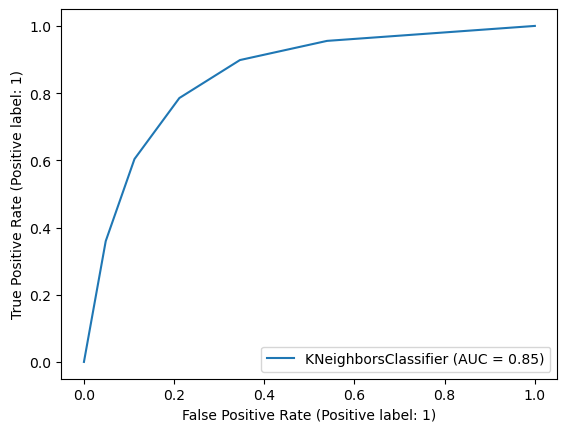

In [64]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred6 = knn.predict(X_test)

print('Accruracy: {}'.format(accuracy_score(y_test, y_pred6)))
print('Recall: {}'.format(recall_score(y_test, y_pred6)))
print('Precision: {}'.format(precision_score(y_test, y_pred6)))
print('F1 score: {}'.format(f1_score(y_test, y_pred6)))
print('roc auc score: {}'.format(roc_auc_score(y_test, y_pred6)))
print(classification_report(y_test, y_pred6))
plot_roc_curve(knn, X_test, y_test)

Text(0.5, 1.0, 'K-Nearest Neighbours confusion matrix')

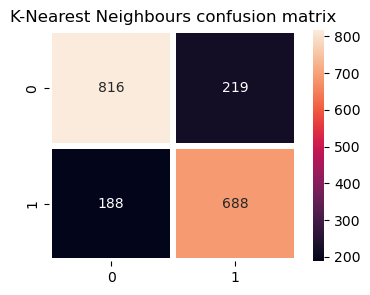

In [65]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred6),
                annot=True,fmt = "d",linecolor="white",linewidths=3)
plt.title('K-Nearest Neighbours confusion matrix')

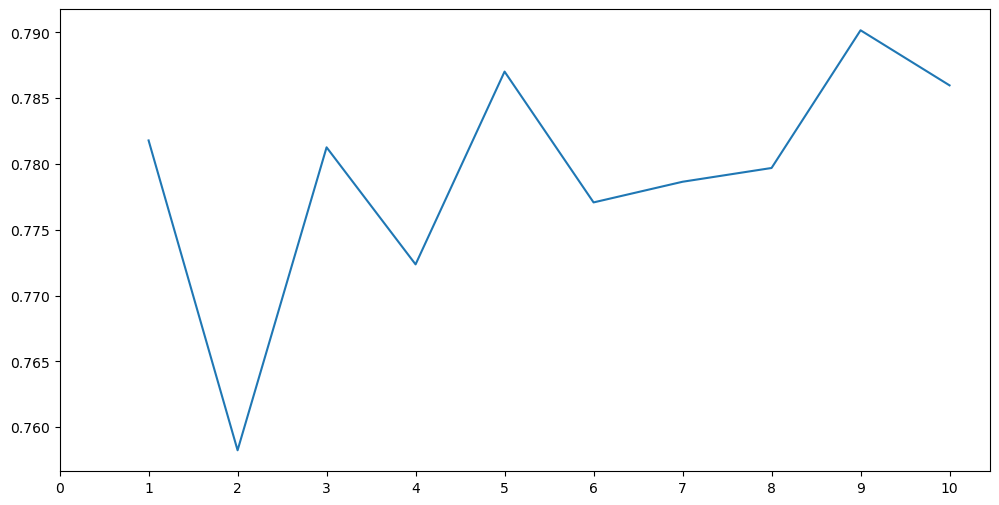

Accuracies for different values of n are: [0.78178964 0.75824176 0.78126635 0.77237049 0.7870225  0.77708006
 0.77864992 0.77969649 0.79016222 0.78597593] with the max value as  0.7901622187336473


In [66]:
# tìm n_neighbors tốt nhất
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train, y_train)
    prediction=model.predict(X_test)
    a=a.append(pd.Series(accuracy_score(prediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:', a.values, 'with the max value as ', a.values.max())

**7. Gaussian Naive Bayes**

Accruracy: 0.7870225013082156
Recall: 0.7853881278538812
Precision: 0.7585446527012127
F1 score: 0.7717330342120022
roc auc score: 0.7868969624776653
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1035
           1       0.76      0.79      0.77       876

    accuracy                           0.79      1911
   macro avg       0.79      0.79      0.79      1911
weighted avg       0.79      0.79      0.79      1911



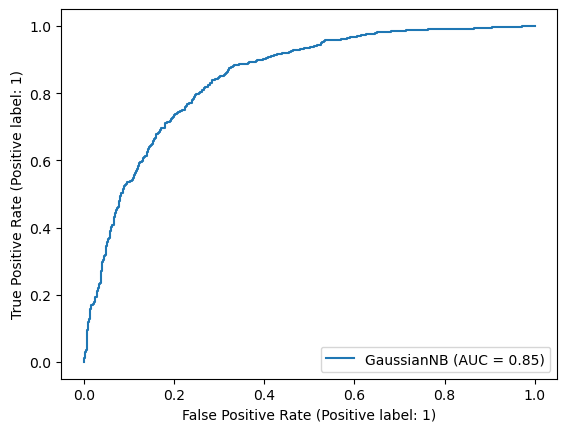

In [67]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred7 = knn.predict(X_test)

print('Accruracy: {}'.format(accuracy_score(y_test, y_pred7)))
print('Recall: {}'.format(recall_score(y_test, y_pred7)))
print('Precision: {}'.format(precision_score(y_test, y_pred7)))
print('F1 score: {}'.format(f1_score(y_test, y_pred7)))
print('roc auc score: {}'.format(roc_auc_score(y_test, y_pred7)))
print(classification_report(y_test, y_pred7))
plot_roc_curve(nb, X_test, y_test)

Text(0.5, 1.0, 'Naive Bayes confusion matrix')

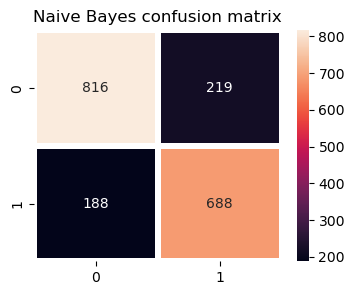

In [68]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred7),
                annot=True,fmt = "d",linecolor="white",linewidths=3)
plt.title('Naive Bayes confusion matrix')

**8. XGBoost**

Accruracy: 0.8315018315018315
Recall: 0.8230593607305936
Precision: 0.8119369369369369
F1 score: 0.8174603174603176
roc auc score: 0.8308533518628813
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1035
           1       0.81      0.82      0.82       876

    accuracy                           0.83      1911
   macro avg       0.83      0.83      0.83      1911
weighted avg       0.83      0.83      0.83      1911



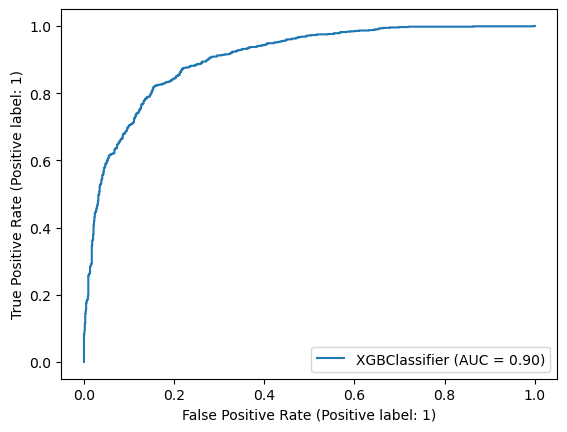

In [69]:
xgb = XGBClassifier(random_state=2023)
xgb.fit(X_train, y_train)
y_pred8 = xgb.predict(X_test)

print('Accruracy: {}'.format(accuracy_score(y_test, y_pred8)))
print('Recall: {}'.format(recall_score(y_test, y_pred8)))
print('Precision: {}'.format(precision_score(y_test, y_pred8)))
print('F1 score: {}'.format(f1_score(y_test, y_pred8)))
print('roc auc score: {}'.format(roc_auc_score(y_test, y_pred8)))
print(classification_report(y_test, y_pred8))
plot_roc_curve(xgb, X_test, y_test)

Text(0.5, 1.0, 'XGBoost confusion matrix')

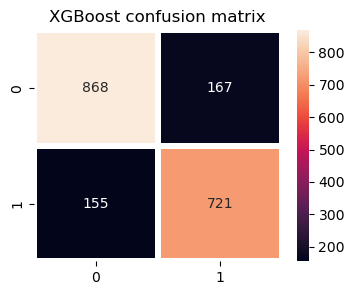

In [70]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred8),
                annot=True,fmt = "d",linecolor="white",linewidths=3)
plt.title('XGBoost confusion matrix')

**Voting Classifier**

In [71]:
from sklearn.ensemble import VotingClassifier

Accruracy: 0.8168498168498168
Recall: 0.8162100456621004
Precision: 0.790929203539823
F1 score: 0.8033707865168539
roc auc score: 0.8168006750049632


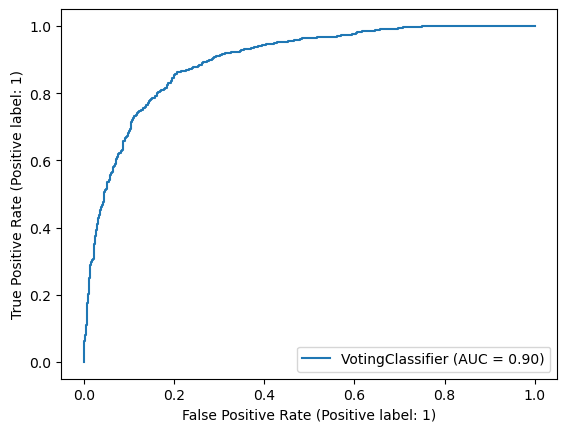

In [77]:
eclf = VotingClassifier(estimators=[('log_reg', log_reg),
                                    ('rdf', rf),
                                    ('svc', svc),
                                    ('linsvc',linear_svc),
                                    ('dt',dct),
                                    ('knn',knn),
                                    ('NB',nb),
                                    ('xgb', xgb)],
                        voting='soft')

eclf.fit(X_train, y_train)
prediction = eclf.predict(X_test)

print('Accruracy: {}'.format(accuracy_score(y_test, prediction)))
print('Recall: {}'.format(recall_score(y_test, prediction)))
print('Precision: {}'.format(precision_score(y_test, prediction)))
print('F1 score: {}'.format(f1_score(y_test, prediction)))
print('roc auc score: {}'.format(roc_auc_score(y_test, prediction)))
plot_roc_curve(eclf, X_test, y_test)

Text(0.5, 1.0, 'Voting Classifier confusion matrix')

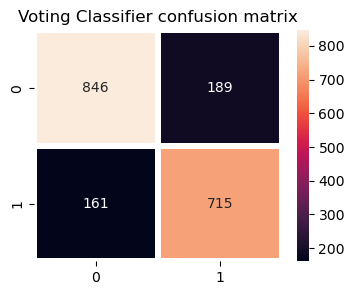

In [78]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction),
                annot=True,fmt = "d",linecolor="white",linewidths=3)
plt.title('Voting Classifier confusion matrix')

**Nhận xét**

- Kết quả khi thực hiện voting classifier: recall = 0.816, precision = 0.790, F1 score = 0.803, ROC AUC score = 0.816
- Kết quả tốt thất là XGBoost classifier: recall = 0.823, precision = 0.811, F1 score = 0.817, ROC AUC score = 0.830

---

# V. Result Summary

In [91]:
recall = [
    recall_score(y_test, y_pred),
    recall_score(y_test, y_pred2),
    recall_score(y_test, y_pred3),
    recall_score(y_test, y_pred4),
    recall_score(y_test, y_pred5),
    recall_score(y_test, y_pred6),
    recall_score(y_test, y_pred7),
    recall_score(y_test, y_pred8),
    recall_score(y_test, prediction)
]

precision = [
    precision_score(y_test, y_pred),
    precision_score(y_test, y_pred2),
    precision_score(y_test, y_pred3),
    precision_score(y_test, y_pred4),
    precision_score(y_test, y_pred5),
    precision_score(y_test, y_pred6),
    precision_score(y_test, y_pred7),
    precision_score(y_test, y_pred8),
    precision_score(y_test, prediction)
]

roc_auc = [
    roc_auc_score(y_test, y_pred),
    roc_auc_score(y_test, y_pred2),
    roc_auc_score(y_test, y_pred3),
    roc_auc_score(y_test, y_pred4),
    roc_auc_score(y_test, y_pred5),
    roc_auc_score(y_test, y_pred6),
    roc_auc_score(y_test, y_pred7),
    roc_auc_score(y_test, y_pred8),
    roc_auc_score(y_test, prediction)
]

accuracy = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, y_pred2),
    accuracy_score(y_test, y_pred3),
    accuracy_score(y_test, y_pred4),
    accuracy_score(y_test, y_pred5),
    accuracy_score(y_test, y_pred6),
    accuracy_score(y_test, y_pred7),
    accuracy_score(y_test, y_pred8),
    accuracy_score(y_test, prediction)
]

f1 = [
    f1_score(y_test, y_pred),
    f1_score(y_test, y_pred2),
    f1_score(y_test, y_pred3),
    f1_score(y_test, y_pred4),
    f1_score(y_test, y_pred5),
    f1_score(y_test, y_pred6),
    f1_score(y_test, y_pred7),
    f1_score(y_test, y_pred8),
    f1_score(y_test, prediction)
]

algorithm = [
    'Logistic Regression',
    'RandomForestClassifier',
    'SVC',
    'LinearSVC',
    'DecisionTreeClassifier',
    'K-Nearest Neighbours',
    'Naive Bayes',
    'XGBClassifier',
    'Voting Classifier'
    ]

In [93]:
result = {
    'Ml Algorithm': algorithm,
    'Accuracy score': accuracy,
    'Recall score': recall,
    'Precision score': precision,
    'F1 score': f1,
    'ROC AUC score': roc_auc
}
result_summary = pd.DataFrame(result)
result_summary.sort_values(by='ROC AUC score', ascending=False)

,Ml Algorithm,Accuracy score,Recall score,Precision score,F1 score,ROC AUC score
7,XGBClassifier,0.831502,0.823059,0.811937,0.817460,0.830853
1,RandomForestClassifier,0.828885,0.801370,0.821053,0.811092,0.826772
8,Voting Classifier,0.816850,0.816210,0.790929,0.803371,0.816801
2,SVC,0.800105,0.792237,0.776286,0.784181,0.799500
3,LinearSVC,0.800105,0.792237,0.776286,0.784181,0.799500
5,K-Nearest Neighbours,0.787023,0.785388,0.758545,0.771733,0.786897
6,Naive Bayes,0.787023,0.785388,0.758545,0.771733,0.786897
4,DecisionTreeClassifier,0.787546,0.765982,0.769495,0.767735,0.785889
0,Logistic Regression,0.781790,0.785388,0.750273,0.767429,0.782066
